In [1]:
import numpy as np
a=np.random.random((10, 3))
i = np.arange(10)
print (a)
print (a[i,np.argmin (abs((a[0]-0.5)))])

[[0.60932463 0.4342536  0.59179228]
 [0.5572201  0.75921097 0.70273507]
 [0.45211129 0.62229414 0.11671139]
 [0.46400663 0.01827592 0.17365853]
 [0.63831845 0.90624364 0.01325019]
 [0.29436208 0.11699159 0.83738508]
 [0.42414481 0.28420759 0.15859033]
 [0.99083319 0.83506513 0.8518491 ]
 [0.98140133 0.66286894 0.53999138]
 [0.01124521 0.54091055 0.85992485]]
[0.4342536  0.75921097 0.62229414 0.01827592 0.90624364 0.11699159
 0.28420759 0.83506513 0.66286894 0.54091055]


In [2]:
a=np.random.random((6, 6))                           
i = np.arange(6)
print(a)
print(a.sum(axis=1)/a.min(axis=0))

[[0.93418782 0.8393132  0.35978948 0.51991273 0.80776029 0.33438366]
 [0.22292666 0.91608769 0.05036243 0.09440962 0.21130647 0.55093068]
 [0.97034831 0.0735422  0.14247976 0.47922462 0.68424954 0.0453978 ]
 [0.08792073 0.20839689 0.2835866  0.9757458  0.58159416 0.83478129]
 [0.10885468 0.05184809 0.23495837 0.03730155 0.0996775  0.8553157 ]
 [0.94512041 0.14939317 0.43556498 0.39222733 0.98327708 0.79766808]]
[43.16782995 39.46188555 47.56010408 79.67564788 13.9244657  81.57336093]


In [3]:
x = np.array([6,2,0,3,0,0,6,7,0,10])
print(max(np.array([x[i] for i in range(1,9) if x[i-1] == 0])))

6


In [4]:
a = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
a += np.bincount(i, minlength=len(a))
print(a)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [7]:
a = np.arange(16).reshape(4,4)
print(a)
a = np.arange(16).reshape(4, 4)
print(a)
print(a.diagonal(-1))
print({3-i:a.diagonal(3-i).tolist for i in range (7)})

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 4  9 14]
{3: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0ABC0>, 2: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0A6C0>, 1: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0AD00>, 0: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0AD50>, -1: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0ADA0>, -2: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0ADF0>, -3: <built-in method tolist of numpy.ndarray object at 0x00000241BDD0AE40>}


Clustering completed after 10 iterations


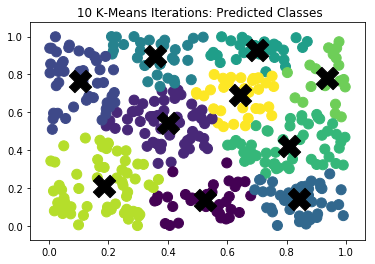

6.570871777688668e-05

In [6]:
X = np.random.rand(400, 2)


def kmeans(X, k, itr, thresh):
    
    centroids = X[:k]
    
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
        
        new_centroids = np.array([X[labels==j, :].mean(axis=0) for j in range(k)])
        
        dist = ((new_centroids - centroids)**2).sum()
        
        if (dist <= thresh) or (new_centroids == centroids).all():
            break
        else:
            centroids = new_centroids
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {itr} iterations")
    
    print(f"Clustering completed after {i} iterations")
    return(centroids, dist, labels, i)

centroids, dist, labels, i = kmeans(X, 10, 100, 1e-04)       

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=X[:, 0], y=X[:, 1], s=100, c=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=500, c='k', marker='X')
plt.title(f" {i} K-Means Iterations: Predicted Classes")
plt.show()

dist